#STOCK MARKET ANALYSIS (LSTM)


In [1]:
# To install yfinance Yahoo! finance
!pip install -q yfinance

In [16]:
# Required Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline



import matplotlib.image as mpimg  # For displaying images
import os  # For file paths


import matplotlib.gridspec as gridspec

In [17]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
import re
import json


In [18]:
# For time stamps
from datetime import datetime

In [19]:
# The tech stocks we'll use for this analysis
tech_list = ['TSLA', 'NVDA', 'META']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [TSLA, NVDA, META]
company_name = ["TESLA", "NVIDIA", "META"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,,NVDA,NVDA,NVDA,NVDA,NVDA,META,META,META,META,META
Date,,,,,,,,,,,,,,,,
2025-02-07,NaN,NaN,NaN,NaN,NaN,META,NaN,NaN,NaN,NaN,NaN,714.520020,725.010010,711.750000,716.799988,16427100.0
2025-02-10,NaN,NaN,NaN,NaN,NaN,META,NaN,NaN,NaN,NaN,NaN,717.400024,721.200012,711.330017,718.559998,12904300.0
2025-02-11,NaN,NaN,NaN,NaN,NaN,META,NaN,NaN,NaN,NaN,NaN,719.799988,723.659973,710.039978,713.320007,12998000.0
2025-02-12,NaN,NaN,NaN,NaN,NaN,META,NaN,NaN,NaN,NaN,NaN,725.380005,727.099976,712.599976,715.299988,12016500.0
2025-02-13,NaN,NaN,NaN,NaN,NaN,META,NaN,NaN,NaN,NaN,NaN,728.559998,729.000000,718.039978,721.520020,12569100.0
2025-02-14,NaN,NaN,NaN,NaN,NaN,META,NaN,NaN,NaN,NaN,NaN,736.669983,740.909973,725.619995,726.140015,16901200.0
2025-02-18,NaN,NaN,NaN,NaN,NaN,META,NaN,NaN,NaN,NaN,NaN,716.369995,737.000000,706.440002,736.000000,21938700.0
2025-02-19,NaN,NaN,NaN,NaN,NaN,META,NaN,NaN,NaN,NaN,NaN,703.770020,707.000000,695.390015,704.099976,17535500.0


In [20]:
##EDA & Feature Engineering

In [21]:
# Summary Stats
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-02-23 to 2025-02-21
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, TSLA)     250 non-null    float64
 1   (High, TSLA)      250 non-null    float64
 2   (Low, TSLA)       250 non-null    float64
 3   (Open, TSLA)      250 non-null    float64
 4   (Volume, TSLA)    250 non-null    int64  
 5   (company_name, )  250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


In [22]:
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-02-23 to 2025-02-21
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, NVDA)     250 non-null    float64
 1   (High, NVDA)      250 non-null    float64
 2   (Low, NVDA)       250 non-null    float64
 3   (Open, NVDA)      250 non-null    float64
 4   (Volume, NVDA)    250 non-null    int64  
 5   (company_name, )  250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


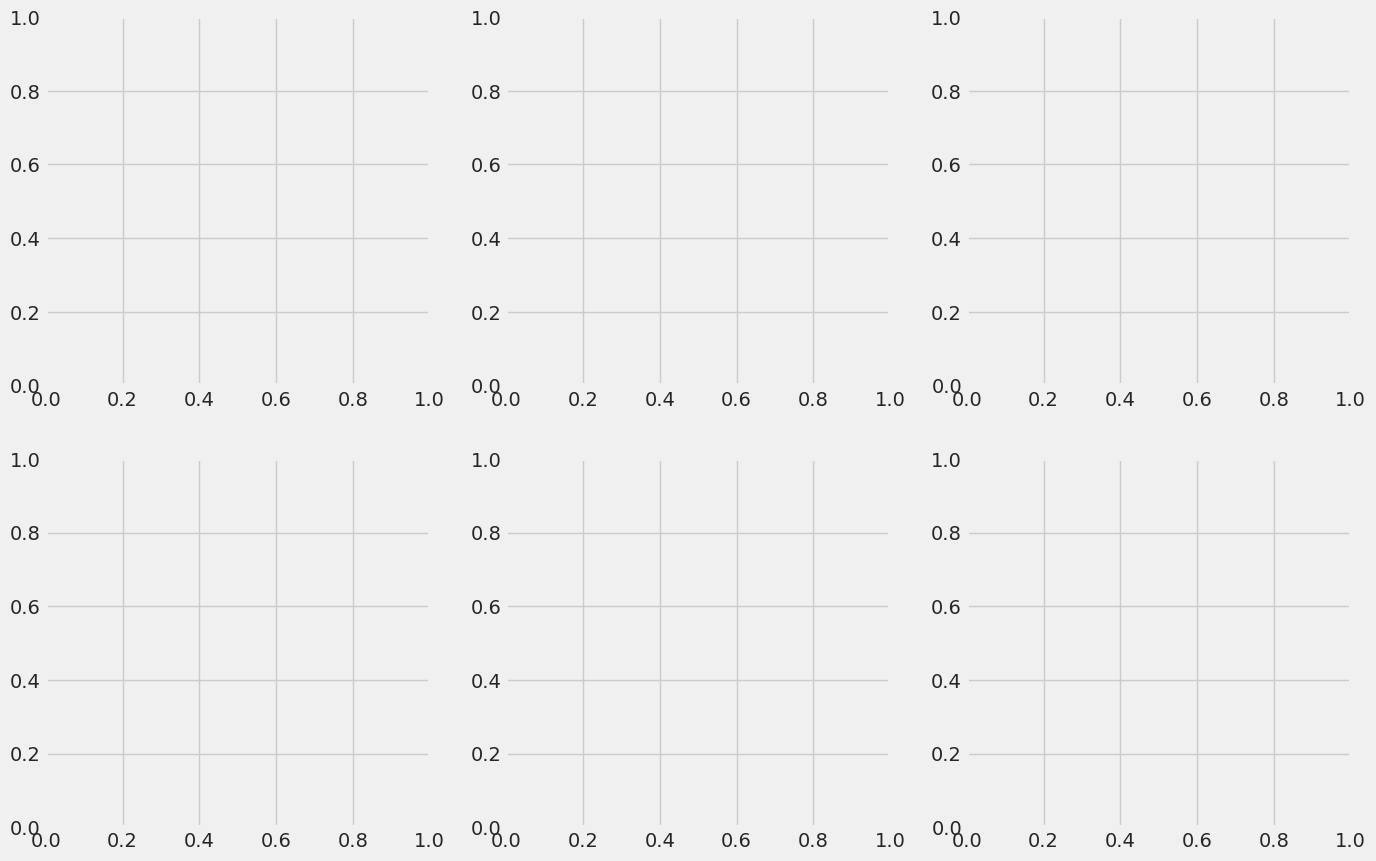

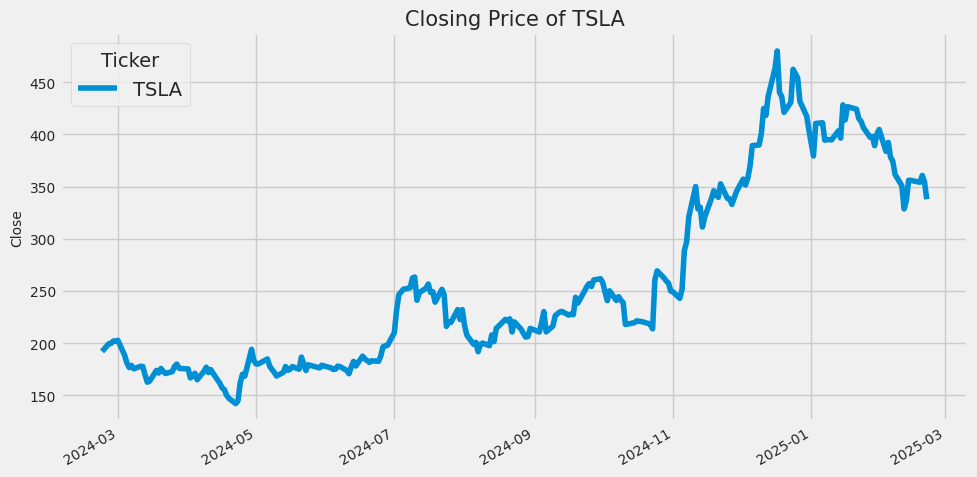

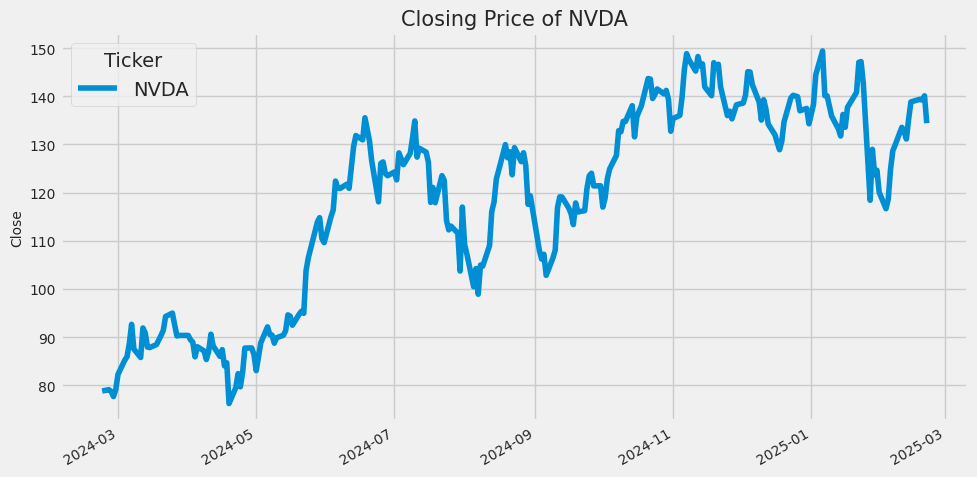

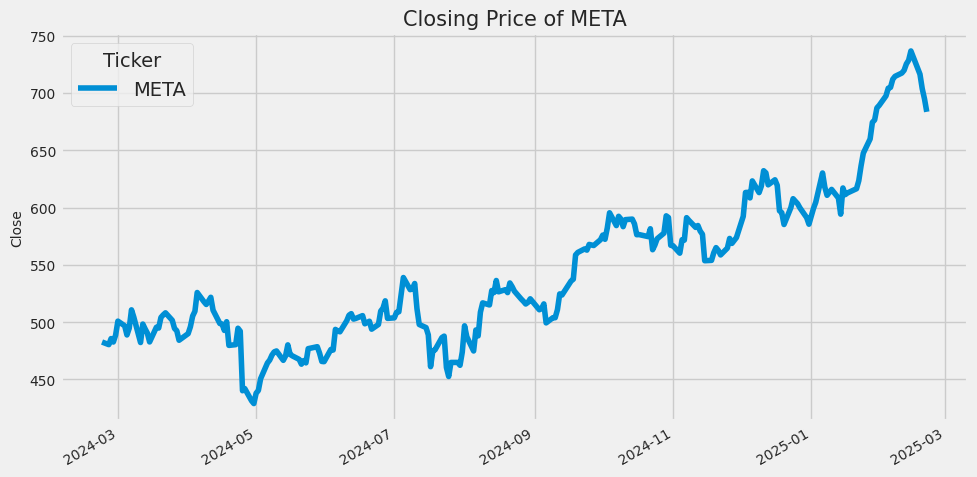

In [23]:
#Closing

# Let's see a historical view of the closing price
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Increased figure size
axes = axes.flatten()

if company_list:
    df = pd.concat(company_list, axis=0)

    for i, company in enumerate(company_list):
        if i < len(axes):
            fig, ax = plt.subplots(figsize=(10,5)) #Create a separate figure for each plot.
            company['Close'].plot(ax=ax)
            ax.set_ylabel('Close', fontsize=10)
            ax.set_xlabel(None)
            ax.set_title(f"Closing Price of {tech_list[i]}", fontsize=15)
            ax.tick_params(axis='both', labelsize=10)
            plt.tight_layout() #Prevent labels from overlapping
            plt.show()  # Show *this* figure immediately
            plt.close(fig) #Close the figure to prevent overlaying.
            print("    ")
        else:
            print(f"Warning: More companies than subplots. Skipping {tech_list[i]}.")

else:
    print("No data was downloaded. Cannot plot.")


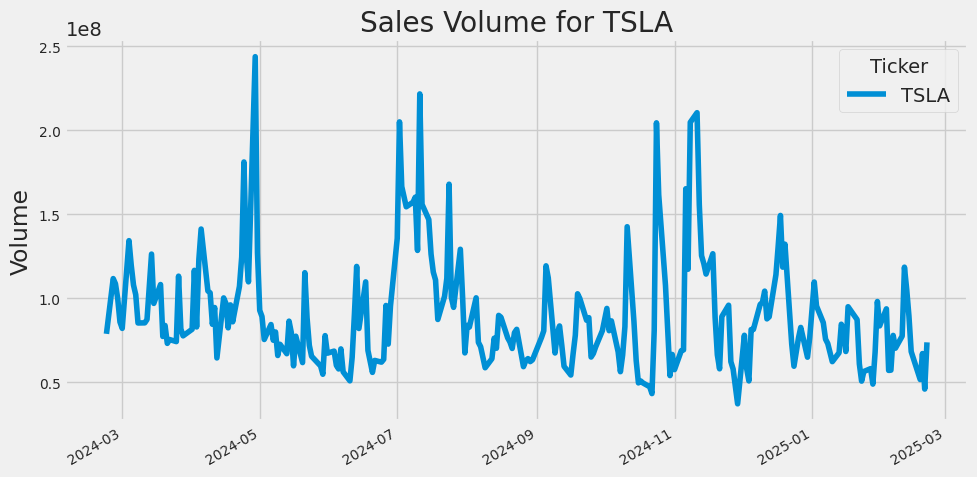

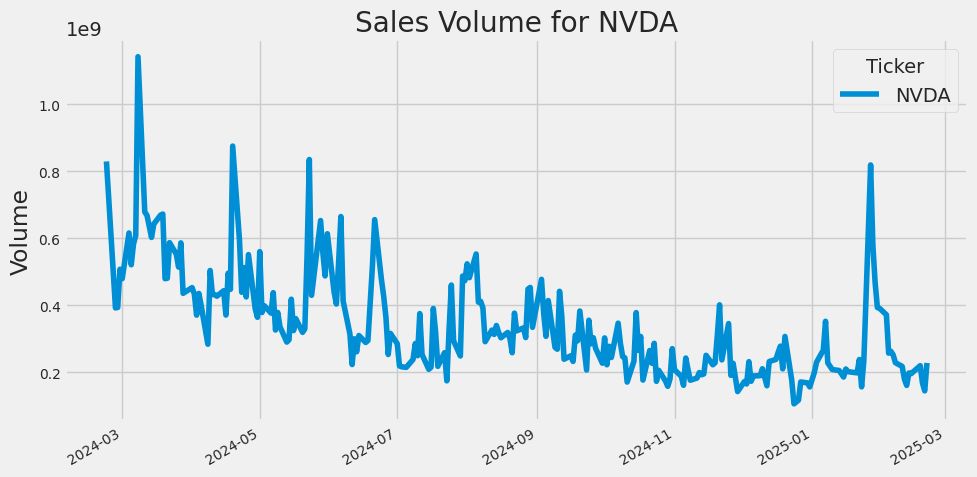

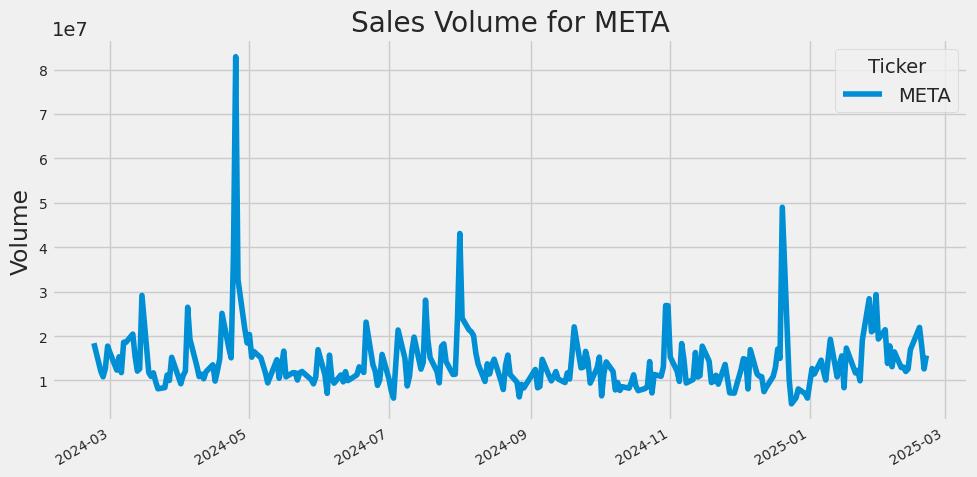

In [24]:
#Volume Of Sales

# Now let's plot the total volume of stock being traded each day

if company_list:
    df = pd.concat(company_list, axis=0)

    for i, company in enumerate(company_list):  # Iterate directly through company_list
        if i < len(tech_list): #Check if tech_list has the name for this company.
            fig, ax = plt.subplots(figsize=(10, 5))
            if 'Volume' in company.columns: #Check if 'Volume' column exists.
                company['Volume'].plot(ax=ax)
                ax.set_ylabel('Volume')
                ax.set_xlabel(None)
                ax.set_title(f"Sales Volume for {tech_list[i]}")  # Correct indexing
                ax.tick_params(axis='both', labelsize=10)
                plt.tight_layout()
                plt.show()
                plt.close(fig)
                print("    ")
            else:
                print(f"Warning: No 'Volume' data found for {tech_list[i]}.")
        else:
            print(f"Warning: More companies than names in tech_list. Skipping {i+1}. ") #More descriptive warning.

else:
    print("No data was downloaded. Cannot plot.")








In [ ]:
#Moving Average Of Various Stock

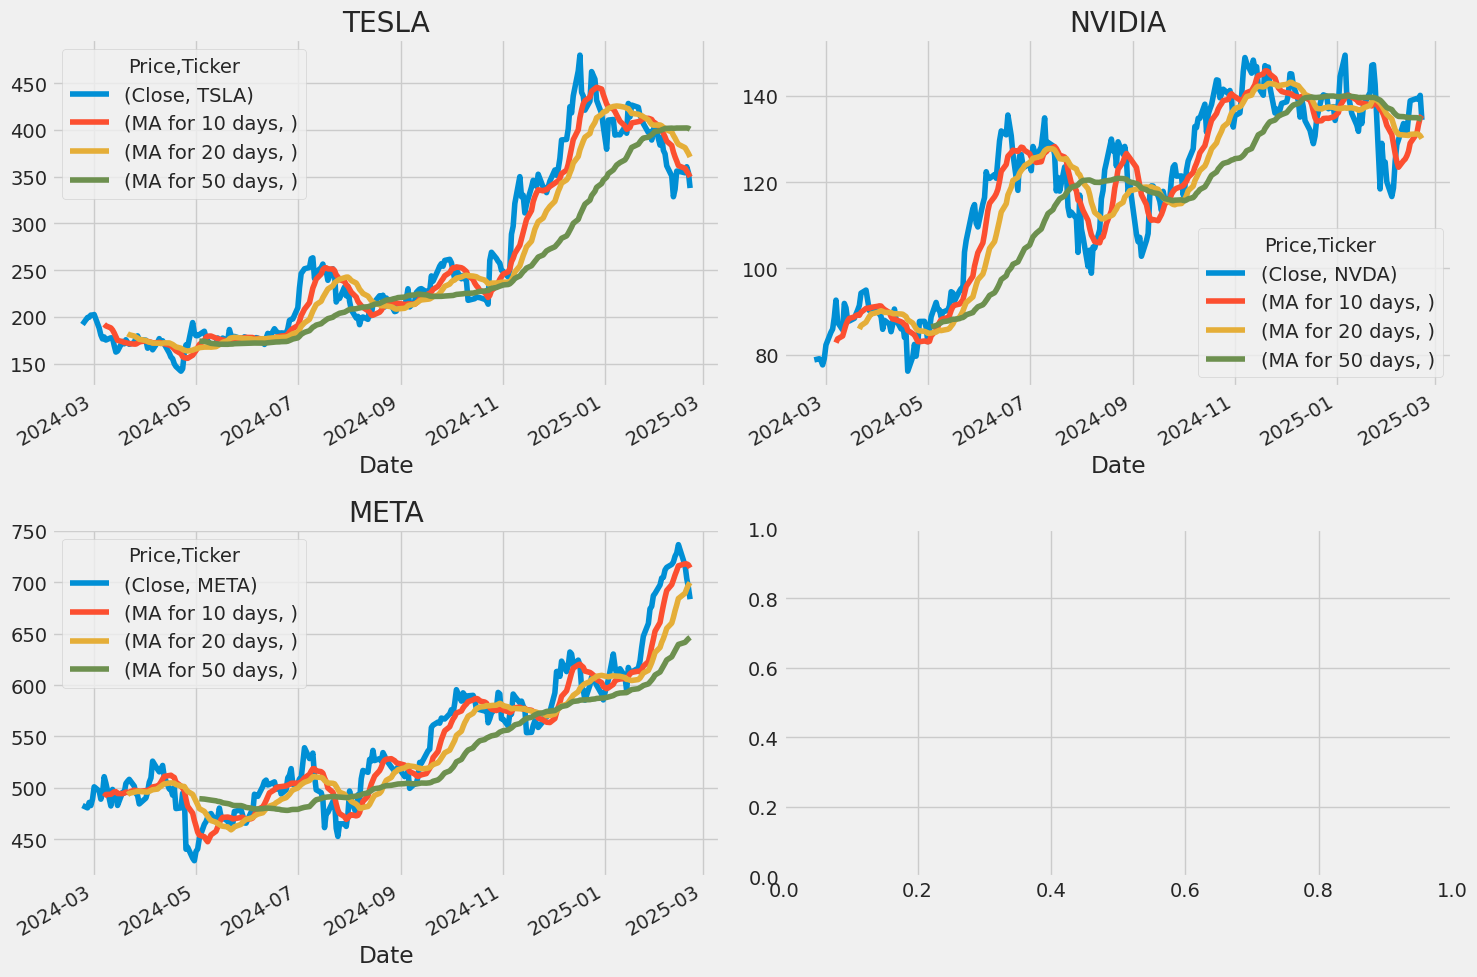

In [25]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('TESLA')

NVDA[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('NVIDIA')

META[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('META')


fig.tight_layout()

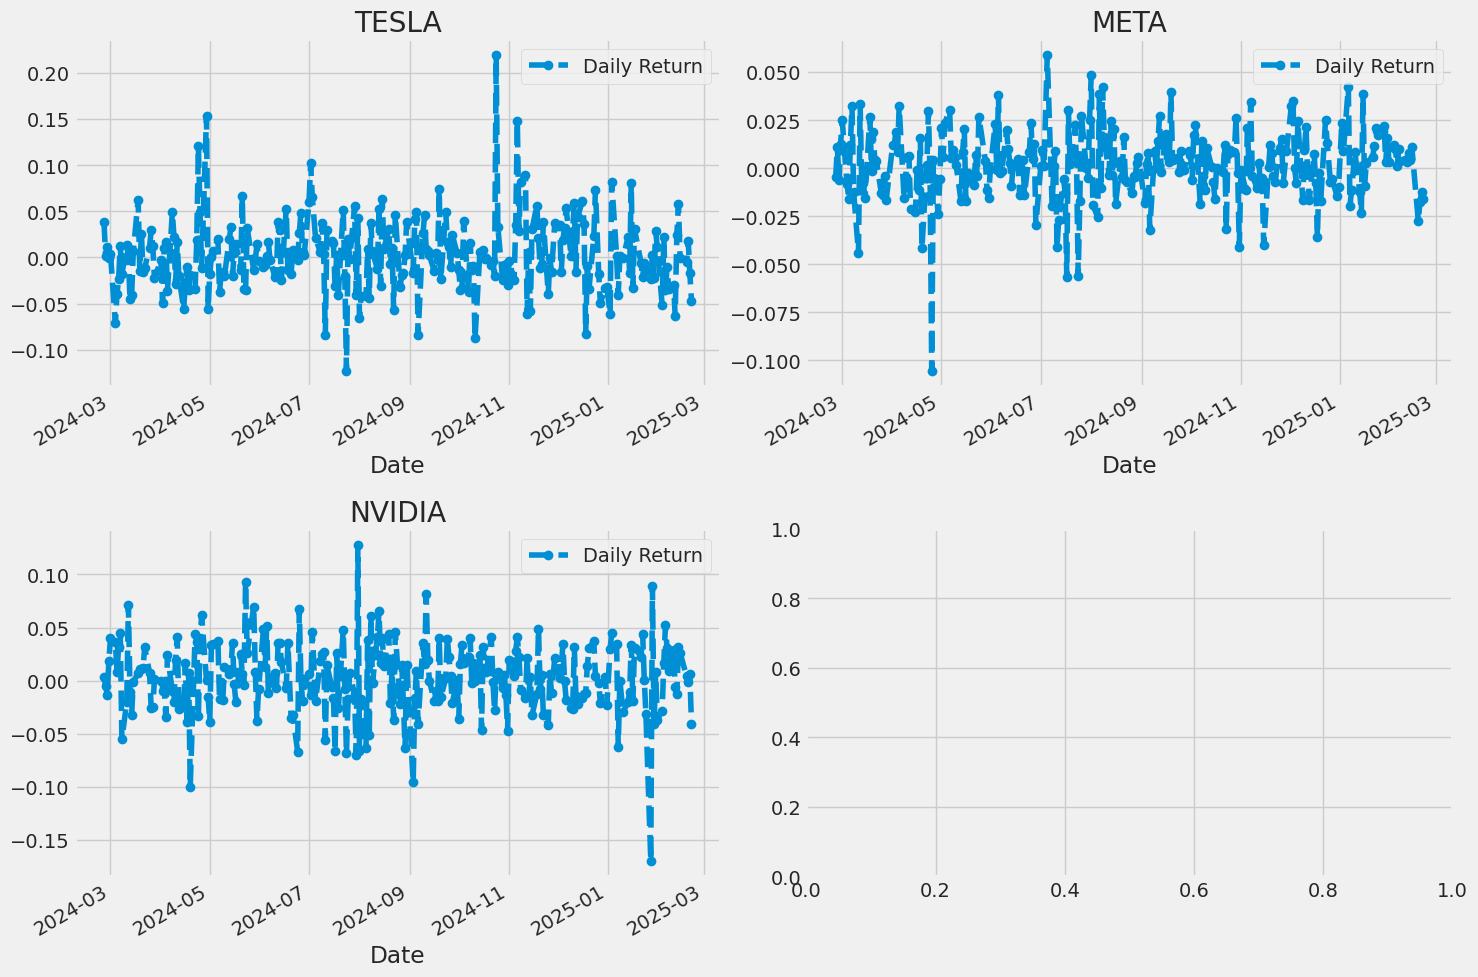

In [26]:
#daily return of the stock on average


# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('TESLA')

META['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('META')

NVDA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('NVIDIA')


fig.tight_layout()

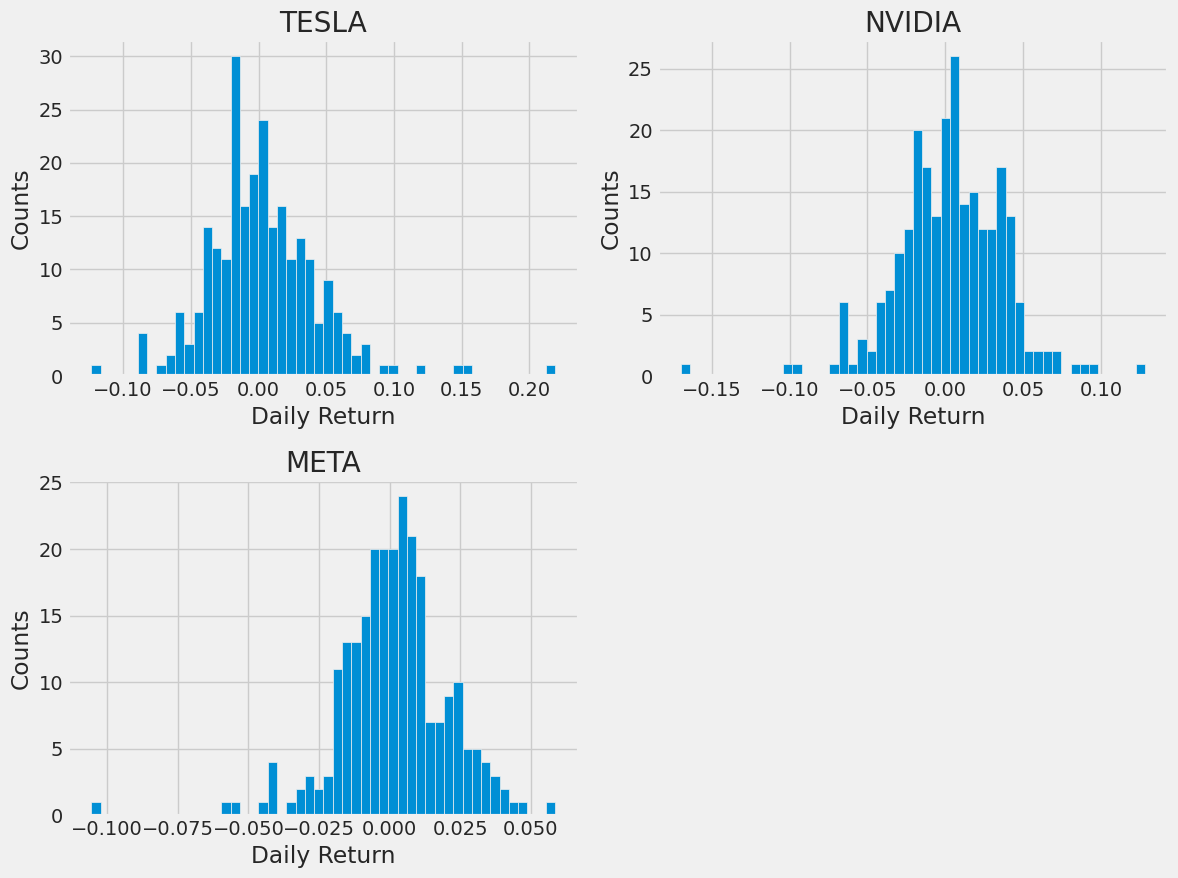

In [27]:
#The average daily return using a histogram


plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()



In [28]:
#The correlation between different stocks closing prices

import yfinance as yf
import pandas as pd
from datetime import datetime

# ... (your start and end dates)

tech_list = ['TSLA', 'NVDA', 'META']

# Download data using yfinance
closing_df = yf.download(tech_list, start=start, end=end)['Close'] # Or 'Close' if you prefer.
opening_df = yf.download(tech_list, start=start, end=end)['Open']


# Calculate returns
tech_rets = closing_df.pct_change()
tech_rets.head()





[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed


Ticker,META,NVDA,TSLA
Date,,,
2024-02-23,NaN,NaN,NaN
2024-02-26,-0.004731,0.003489,0.038704
2024-02-27,0.011023,-0.004944,0.001655
2024-02-28,-0.006221,-0.013189,0.011566
2024-02-29,0.012623,0.018657,-0.000792


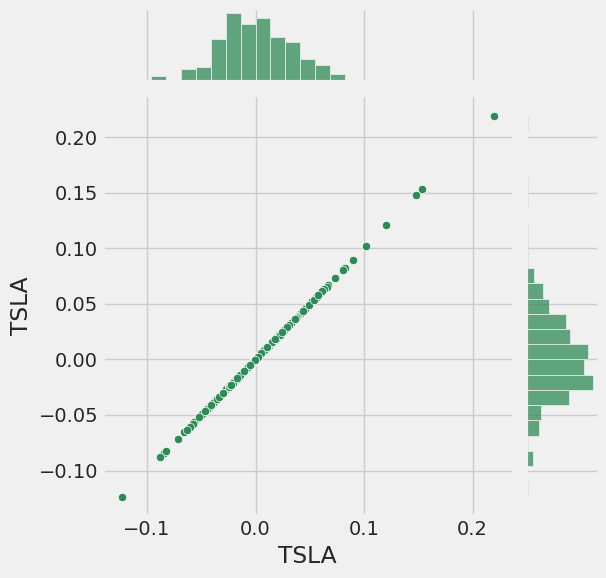

In [29]:
#Compare the Correlation


# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='TSLA', y='TSLA', data=tech_rets, kind='scatter', color='seagreen')

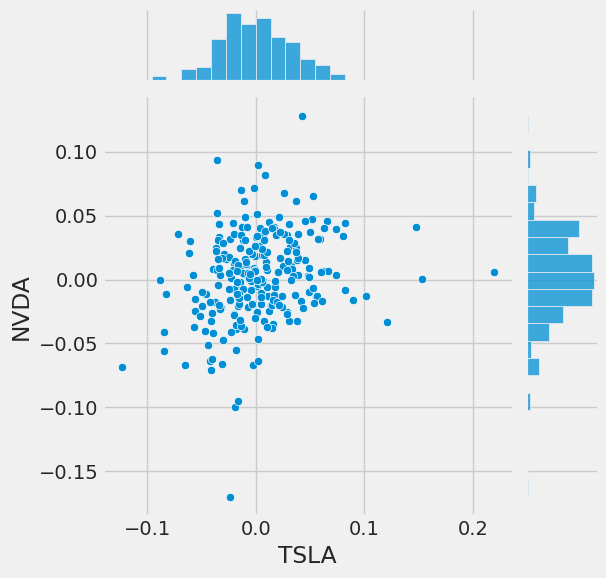

In [30]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='TSLA', y='NVDA', data=tech_rets, kind='scatter')

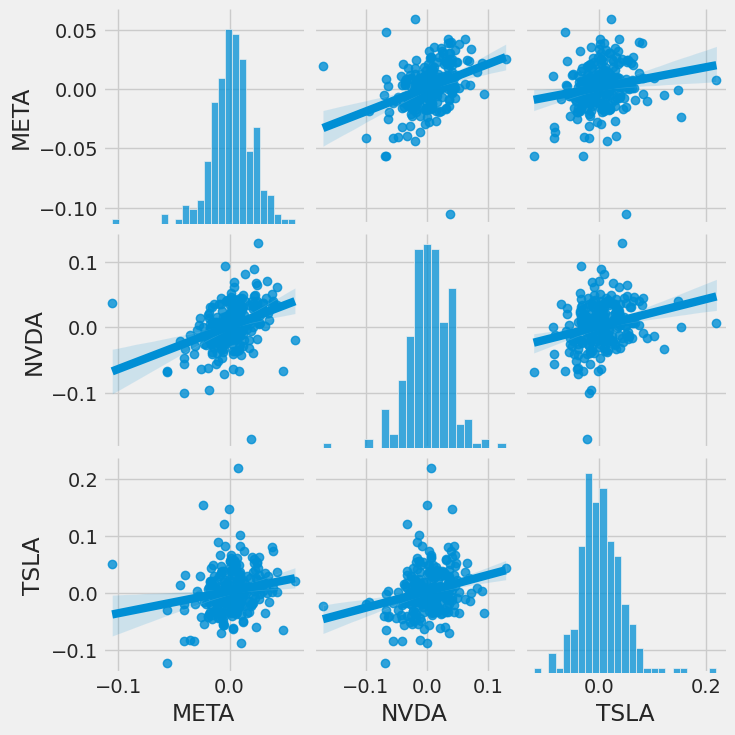

In [31]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

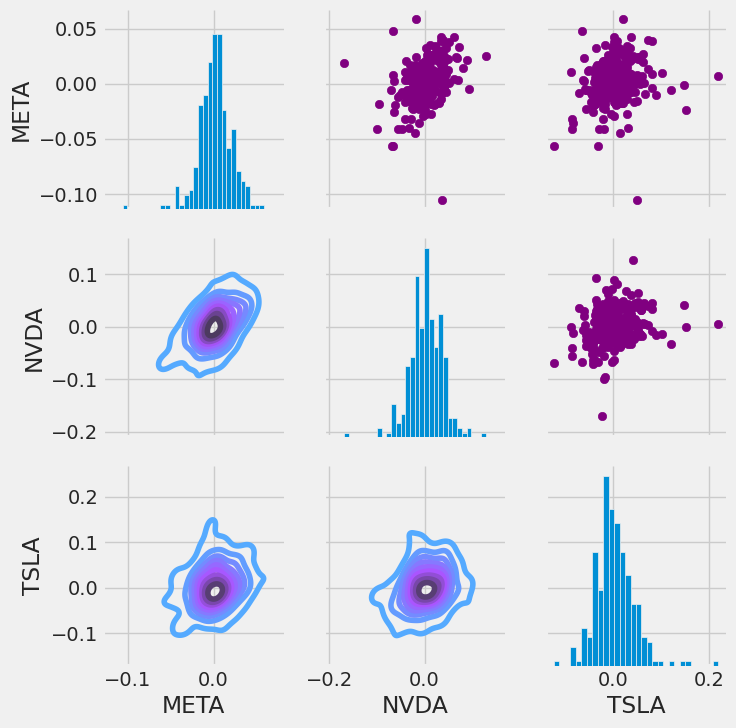

In [32]:
#Using it in PairGrid which give more flexible


# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)


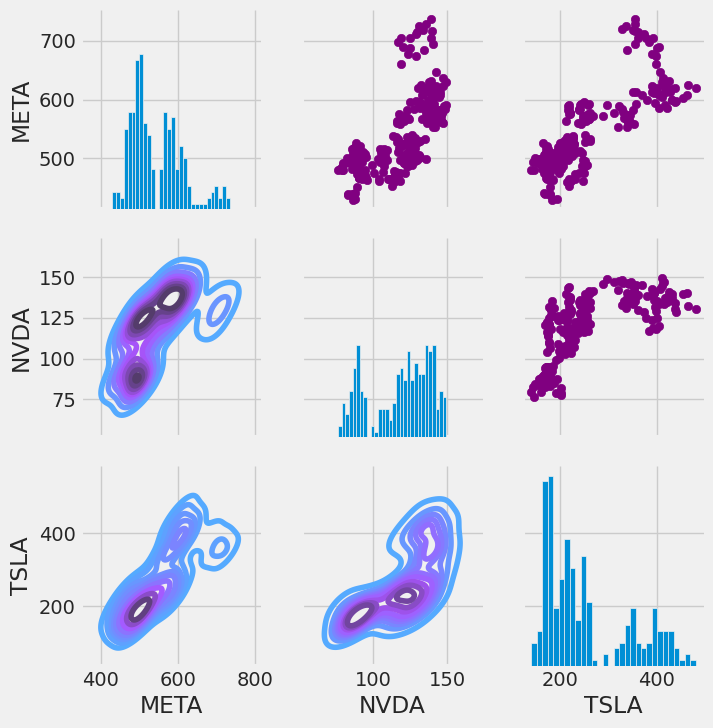

In [33]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)


Text(0.5, 1.0, 'Correlation of stock closing price')

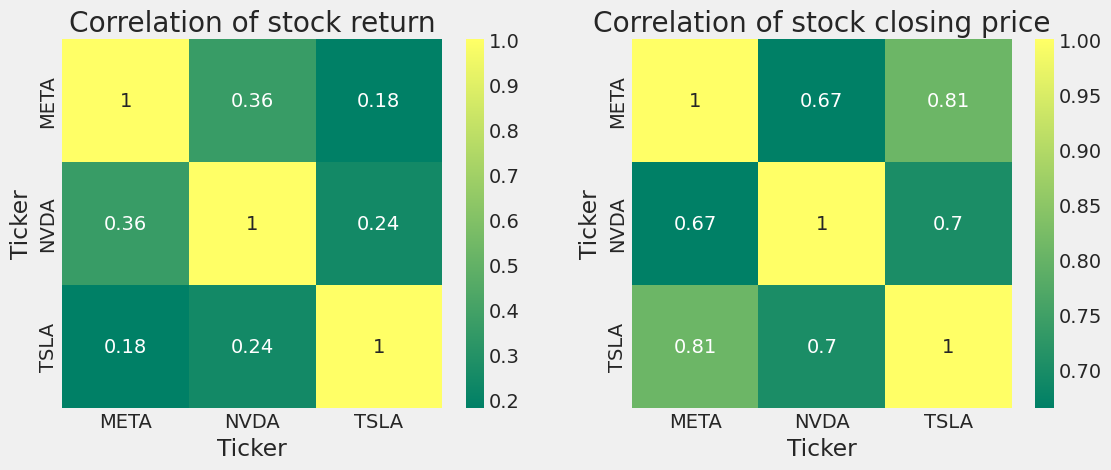

In [34]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

In [35]:
#Value do we put at risk by investing in a particular stock

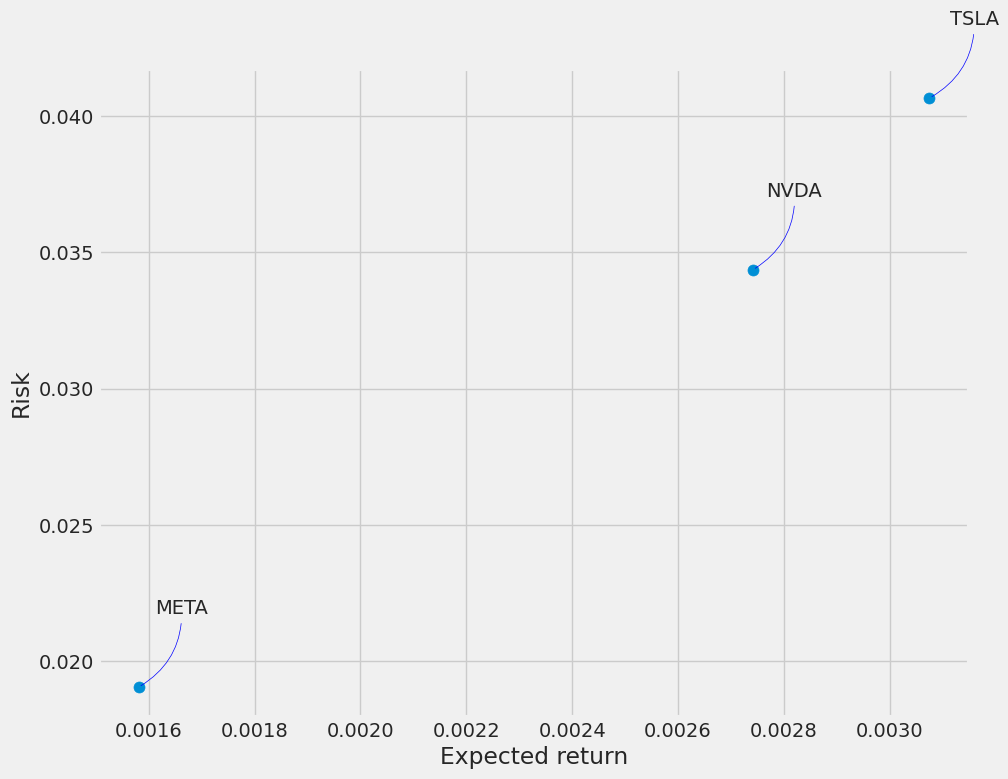

In [36]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [37]:
#Predicting the closing price stock price of APPLE inc

In [38]:
import yfinance as yf
from datetime import datetime

start = '2000-01-01'
end = datetime.now()

try:
    df = yf.download('NVDA', start=start, end=end)
    print(df)
except Exception as e:
    print(f"An error occurred: {e}")

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA
Date                                                                 
2000-01-03    0.089440    0.090992    0.084305    0.090276  300912000
2000-01-04    0.087052    0.088126    0.082633    0.087887  300480000
2000-01-05    0.084186    0.085977    0.082992    0.084544  188352000
2000-01-06    0.078692    0.084186    0.075469    0.084186  120480000
2000-01-07    0.080007    0.080842    0.077141    0.078335   71184000
...                ...         ...         ...         ...        ...
2025-02-14  138.850006  139.250000  135.500000  136.479996  195479600
2025-02-18  139.399994  143.440002  137.929993  141.270004  219176600
2025-02-19  139.229996  141.360001  137.220001  139.509995  167536000
2025-02-20  140.110001  140.660004  136.789993  140.029999  143903600
2025-02-21  134.429993  141.460007  134.029999  140.039993  227352400

[6323 rows x 5 colu

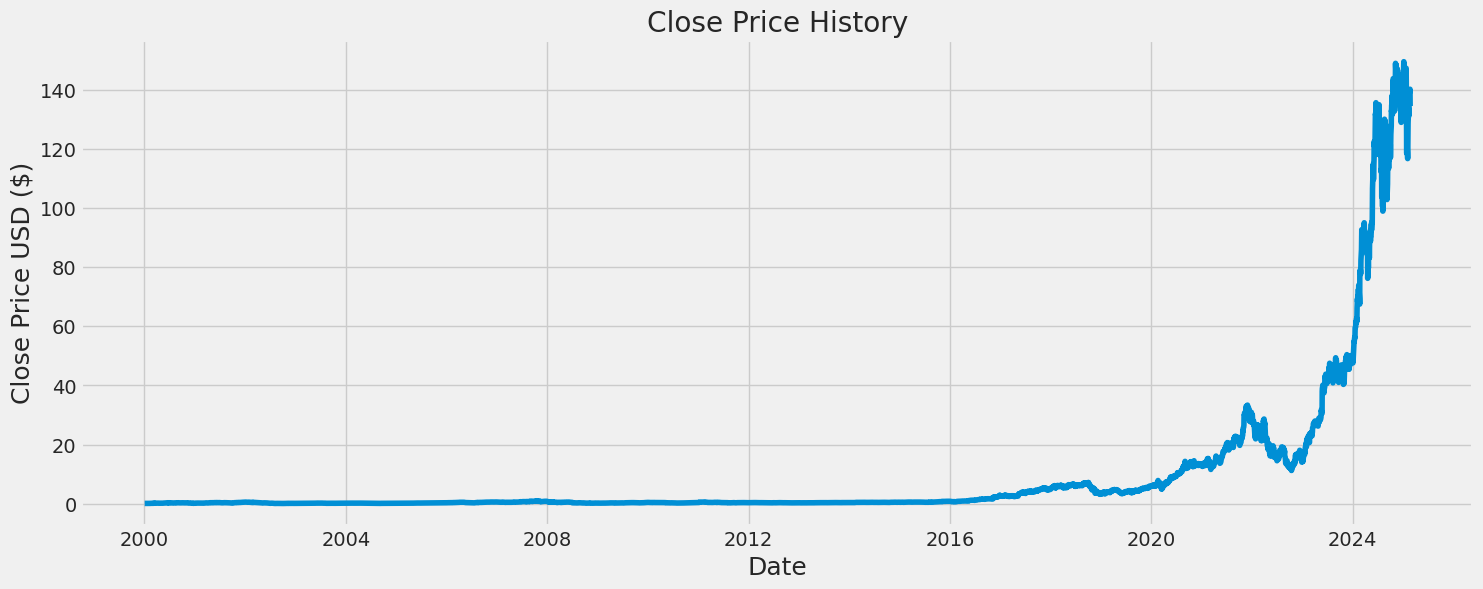

In [39]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [40]:
# Create a new dataframe with only the 'Close column
data = df[['Close']]  # Use double brackets to select the 'Close' column as a DataFrame
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len


6007

In [41]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[2.21692550e-04],
       [2.05705194e-04],
       [1.86519111e-04],
       ...,
       [9.31714893e-01],
       [9.37606191e-01],
       [8.99580695e-01]])

In [42]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([2.21692550e-04, 2.05705194e-04, 1.86519111e-04, 1.49743266e-04,
       1.58541339e-04, 1.76125016e-04, 1.53740205e-04, 1.40153317e-04,
       1.61734032e-04, 1.84916755e-04, 2.08903873e-04, 2.03304827e-04,
       2.01708406e-04, 1.95311049e-04, 1.69733595e-04, 1.64932610e-04,
       1.42547949e-04, 1.15367939e-04, 1.00983139e-04, 9.69862009e-05,
       1.08172571e-04, 1.21765444e-04, 1.29759122e-04, 1.41749788e-04,
       1.09775127e-04, 1.32957900e-04, 1.45746278e-04, 2.52869149e-04,
       2.62465184e-04, 3.64786721e-04, 3.36010789e-04, 3.68783710e-04,
       3.95165110e-04, 4.84704405e-04, 4.60716788e-04, 4.65518023e-04,
       4.57524844e-04, 4.05559455e-04, 3.99966395e-04, 4.41530955e-04,
       4.17550171e-04, 3.63988710e-04, 3.75979177e-04, 3.71184078e-04,
       6.88555305e-04, 6.97346944e-04, 9.05796770e-04, 1.13222870e-03,
       1.53194351e-03, 1.03150394e-03, 9.73945488e-04, 8.27450230e-04,
       9.00400182e-04, 8.99601921e-04, 8.36444376e-04, 8.45242200e-04,
     

In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5947/5947 ━━━━━━━━━━━━━━━━━━━━ 311s 52ms/step - loss: 1.9350e-04


In [44]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse




10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


4.373783433479475

<ipython-input-45-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


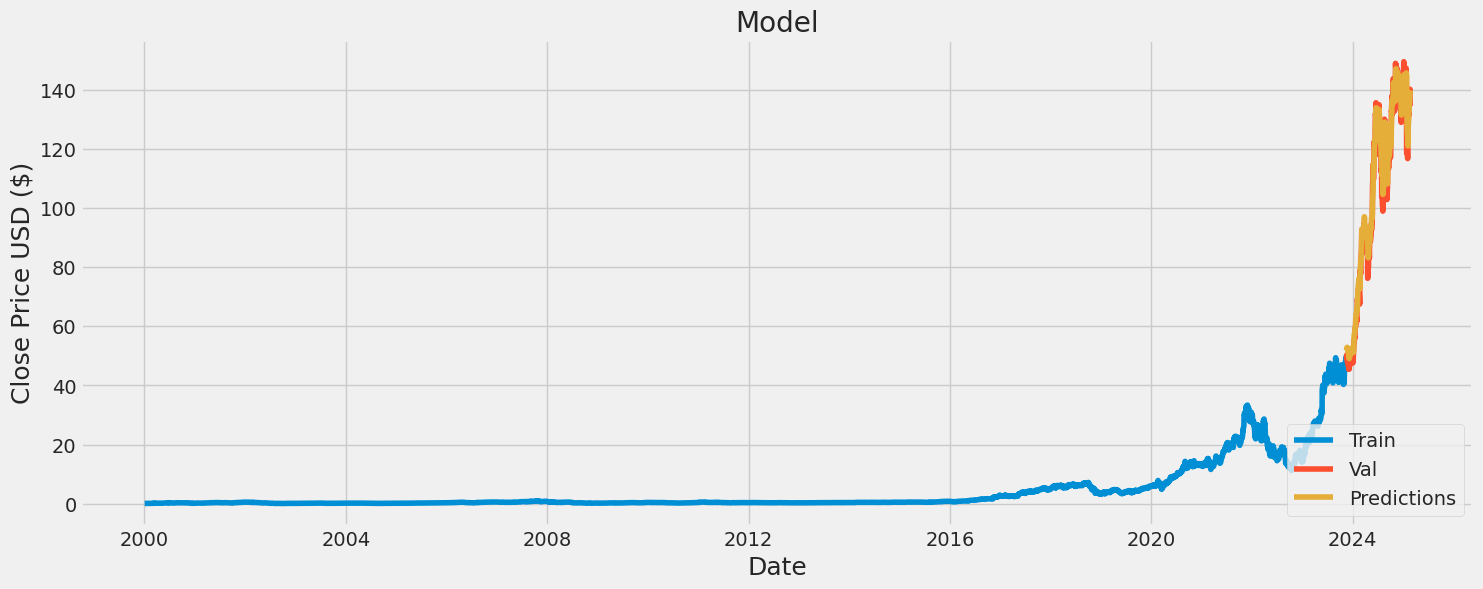

In [45]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [46]:
# Show the valid and predicted prices
valid

Price,Close,Predictions
Ticker,NVDA,
Date,,
2023-11-16,49.461628,51.867966
2023-11-17,49.279697,52.098145
2023-11-20,50.390282,52.168934
2023-11-21,49.925453,52.672932
2023-11-22,48.697906,52.855438
...,...,...
2025-02-14,138.850006,134.277756
2025-02-18,139.399994,136.675385


In [47]:
op = valid.copy()

In [48]:
op.to_csv('Predicted.csv')